In [177]:
import pandas as pd
import numpy as np
from tile_utils import reformat
from tile_utils import is_vertically_and_horizontal_connected
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
df = pd.read_csv('./../data/tile.pat', header=None, sep='\t')
num_labels = 1
field_size = 7
train_dataset = df.ix[:,0:(field_size*field_size-1)]
train_labels = df.ix[:,(field_size*field_size)]

In [179]:
train_dataset, train_labels = utils.reformat(train_dataset, train_labels)

In [157]:
def plot_field(field):
    field = field.reshape(field_size,field_size)
    G = np.zeros((field_size,field_size,3))
    G[field==-1] = [1,1,1]#white
    G[field==1] = [0,0,0]#black

    plt.imshow(G,interpolation='nearest')
    plt.show()

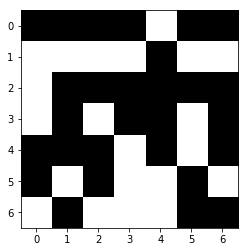

-1.0
1


array([[ 1.,  1.,  1.,  1., -1.,  1.,  1.],
       [-1., -1., -1., -1.,  1., -1., -1.],
       [-1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  1., -1.,  1.,  1., -1.,  1.],
       [ 1.,  1.,  1., -1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1., -1.,  1., -1.],
       [-1.,  1., -1., -1., -1.,  1.,  1.]], dtype=float32)

In [158]:
cur_field_id = 3237
cur_field = train_dataset[cur_field_id]
cur_field = cur_field.reshape(field_size,field_size)
plot_field(cur_field)
print(train_labels[cur_field_id])
print(is_vertically_and_horizontal_connected(cur_field))
cur_field

In [176]:
# store (id, correct label)
wrong_label_id = []
correct_label = []
remove_label = []

for cur_field_id in range(0, len(train_dataset)):
    cur_field = train_dataset[cur_field_id]
    cur_field = cur_field.reshape(field_size,field_size)
    # correct label in case it is connected, but marks think claims it is not connected
    if (is_vertically_and_horizontal_connected(cur_field)==2 and train_labels[cur_field_id] != 1):
        wrong_label_id.append(cur_field_id)
        correct_label.append(1)
    # correct label in case it is not connected, but marks think claims it is connected
    if (is_vertically_and_horizontal_connected(cur_field)==0 and train_labels[cur_field_id] != -1):
        wrong_label_id.append(cur_field_id)
        correct_label.append(-1)
    # remove all that are only patial connected
    elif(is_vertically_and_horizontal_connected(cur_field)==1):
        remove_label.append(cur_field_id)

print(len(wrong_label_id))

0


In [160]:
print((len(wrong_labels)+len(remove_label)) / len(train_dataset)*100)

16.766666666666666


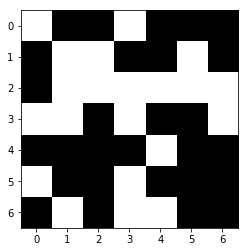

-1.0
0


In [131]:
x = 5999
plot_field(train_dataset[x].reshape(field_size,field_size))
print(train_labels[x])
print(is_vertically_and_horizontal_connected(train_dataset[x].reshape(field_size,field_size)))

In [180]:
utils.correct_it(train_dataset,train_labels,7)